## Data Overview & Exploration for the Deals Dataset - DS 5640 Midterm Project
## Completed by: Najma Thomas-Akpanoko

In [19]:
# import exploratory data analysis (EDA) essential libraries

import pandas as pd # for data manipulation and calculations
import numpy as np # for data manipulation and calculations
import seaborn as sns  # for data visualization                   
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns


# read in the dataset
df = pd.read_csv('anonymized_hubspot_deals.csv')
# print the first 5 rows of the dataframe
print(df.head())


   Weighted amount                       Deal Description  \
0            250.0                        40-50 employees   
1              0.0                        3,000 + Agents.   
2              0.0                            5-6k agents   
3              0.0            Furthest Along - 300 agents   
4          10000.0  BPO through partnership with AmplifAI   

  Cumulative time in "BANT Deal. Pain ID'ed (Sales Pipeline)" (HH:mm:ss)  \
0                                                NaN                       
1                                                NaN                       
2                                                NaN                       
3                                                NaN                       
4                                                NaN                       

  Cumulative time in "Opportunity (Sales Pipeline)" (HH:mm:ss)  Days to close  \
0                                                NaN                       69   
1             

In the following section, the structure of the dataset was inspected.  First, the shape of the dataset was found to has 593 rows, and 50 columns.  Then, the datatypes and the number of non-null values were determined for each column. Lastly, duplicate entries in each row were identified and dropped from the dataset.

In [20]:
# understand the dataset

# print the shape of the dataframe
print(df.shape)

# determine the data types of the columns and the number of non-null values
print(df.info())

# identify and quantify missing values in the dataset
df.isnull().sum()

#check for duplicate rows in the dataset
df.duplicated().sum()

# drop duplicate rows
df = df.drop_duplicates()
print(df.shape)

(593, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 50 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Weighted amount                                                                573 non-null    float64
 1   Deal Description                                                               491 non-null    object 
 2   Cumulative time in "BANT Deal. Pain ID'ed (Sales Pipeline)" (HH:mm:ss)         209 non-null    object 
 3   Cumulative time in "Opportunity (Sales Pipeline)" (HH:mm:ss)                   37 non-null     object 
 4   Days to close                                                                  593 non-null    int64  
 5   Deal Score                                                                     167 non-null    float64
 6   Close Date      

In the following section, the the dataset was cleaned by deleting columns that had over 80% of missing values.  This process was completed because there is a low likelihood of columns with a lot of missing data adding valuable insights into the EDA analysis.

In [21]:
# clean the dataset

# delete columns that are not needed because they have over 80% missing values
drop_threshold = 0.8 * len(df)
df = df.dropna(axis=1, thresh=drop_threshold)
print(df.shape)
print(df.info())

(593, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Weighted amount                      573 non-null    float64
 1   Deal Description                     491 non-null    object 
 2   Days to close                        593 non-null    int64  
 3   Close Date                           543 non-null    object 
 4   Deal source attribution 2            587 non-null    object 
 5   Pipeline                             593 non-null    object 
 6   Record ID                            593 non-null    int64  
 7   Forecast category                    593 non-null    object 
 8   Original Traffic Source              577 non-null    object 
 9   Associated Company                   572 non-null    object 
 10  Deal owner                           558 non-null    object 
 11  Is Closed (numeric)   

In the following section, datatypes were converted to their appropriate format.  To start, the data columns were converted to the datetime format. Then, cateogorical columns were converted to the datatype of category from object (including "Pipeline", "Deal Stage", "Deal source attribution 2", "Forecast category", "Original Traffic Source", "Deal owner", "Deal Type").  Afterwards, numerial columns with missing values were filled with the median value of the column. Lastly, categorical columns were checked to see if they having missing values.  If missing values were present, then the missing value was replaced with the columns mode.

In [22]:
# convert datatypes of columns

# Convert date columns to datetime
df["Close Date"] = pd.to_datetime(df["Close Date"], errors='coerce')
df["Create Date"] = pd.to_datetime(df["Create Date"], errors='coerce')
df["Last Modified Date"] = pd.to_datetime(df["Last Modified Date"], errors='coerce')

# Convert categorical columns to category type
categorical_cols = ["Pipeline", "Deal Stage", "Deal source attribution 2", "Forecast category", "Original Traffic Source", "Deal owner", "Deal Type"]
df[categorical_cols] = df[categorical_cols].astype("category")

print(df.dtypes)


# Fill missing values in key numerical columns with median
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# check if numerical columns still have missing values
df.isnull().sum()

# Fill missing values in key categorical columns with mode
categorical_columns = df.select_dtypes(include=['category']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


Weighted amount                               float64
Deal Description                               object
Days to close                                   int64
Close Date                             datetime64[ns]
Deal source attribution 2                    category
Pipeline                                     category
Record ID                                       int64
Forecast category                            category
Original Traffic Source                      category
Associated Company                             object
Deal owner                                   category
Is Closed (numeric)                             int64
Amount in company currency                    float64
Deal probability                              float64
Associated Company (Primary)                   object
Is Closed Won                                    bool
Is closed lost                                   bool
Weighted amount in company currency           float64
Is Deal Closed?             

In the following section, the first step of the EDA analysis was performed.  The summary statistics of the dataset was found, and this includes the data's mean, count, standard deviation, minimum, maximum, and quartiles for each column. Key insights from this analysis includes high variability in the deal amounts.  Most deals are low in value, but there are a few outliers that increase the mean of the set.  Additionally, only 27% of the deals are closed successfully.  Most deals take 154 days to close, which is generally a long amount of time.

In [23]:
# EDA Analysis Step 1: Summary Statistics

# Get descriptive statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)


       Weighted amount  Days to close                     Close Date  \
count       593.000000     593.000000                            543   
mean      15268.472175     153.819562  2024-02-17 17:48:35.359116032   
min           0.000000       0.000000            2020-12-20 10:26:00   
25%           0.000000      89.000000            2022-12-20 11:54:00   
50%           0.000000     128.000000            2024-03-03 20:20:00   
75%       10000.000000     167.000000            2025-01-29 16:44:30   
max      769500.000000    1045.000000            2027-08-01 09:01:00   
std       55271.536142     134.044086                            NaN   

          Record ID  Is Closed (numeric)  Amount in company currency  \
count  5.930000e+02           593.000000                  593.000000   
mean   1.691690e+10             0.715008                39473.200675   
min    9.756567e+09             0.000000                    0.000000   
25%    9.817334e+09             0.000000                 5000.0

In the following section, the second step of the EDA analysis was performed.  Class distributions of categorical features were identified.  Key insights from this analysis indicate that most of the deals are labeled as new, and many of these deals end in failure, as indicated by the deal stage equating to closed lost category. Additionally, most of the forecast category says not forecasted, meaning that forecasting deals is limited.  Lastly, most of the deals original traffic source is from offline sources.

In [24]:
# EDA Analysis Step 2: Check Class Distributions
check_categorical_cols = df.select_dtypes(include='object').columns
for col in check_categorical_cols:
    print(df[col].value_counts())

Deal Description
.                                                         32
Renewal                                                   29
BPO                                                        8
BPO Program                                                5
Training and Coaching                                      3
                                                          ..
50-70 agents                                               1
Zenarate Head to head                                      1
33,000 employees - training                                1
Additional growth of $8,750 in the renewal                 1
HALTED SALES ACTIVITY - Typhoon\nFocus on assisting...     1
Name: count, Length: 400, dtype: int64
Associated Company
Associated_ef811650    23
Associated_4019582e    15
Associated_7059f1f6    11
Associated_141fa164     9
Associated_f62b3a08     9
                       ..
Associated_bedeba1d     1
Associated_951452f2     1
Associated_238a17a9     1
Associated_754ae28b 

In the following section, step 3 of the EDA analysis was performed.  More specifically, a pearson correlation matrix was built to examine the linear relationships between numerical values.  Key insights from this analysis include a strong correlation between "Is Closed Won" and "Deal Probability", as a correlation of 0.91 was seen.  Additionally, other features that had financial elements such as amount, forecast amount, and weighted amount had high correlations of 0.73.  Lastly, other variables such as days to close and record ID had no meaningful correlation.

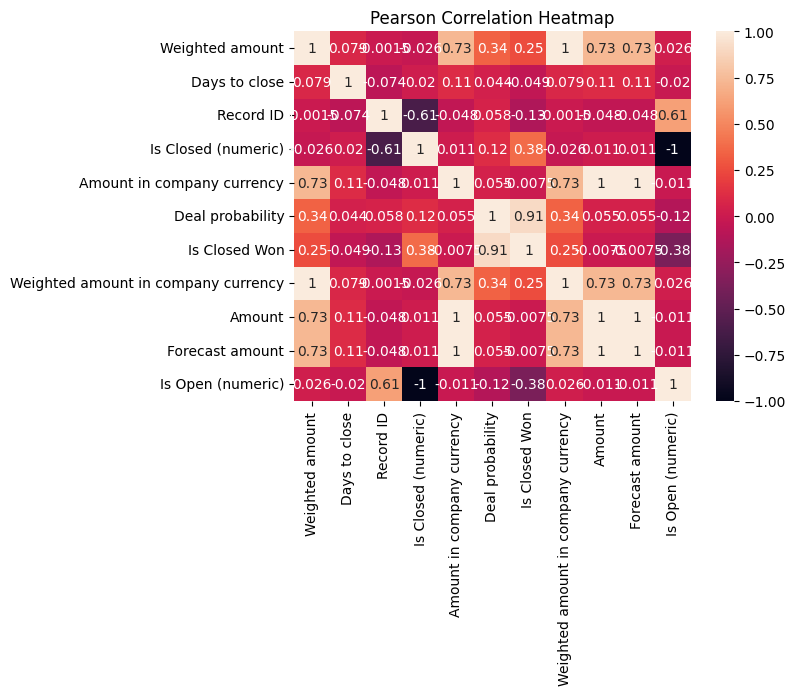

In [25]:
## EDA Analysis Step 3: Buld a Correlation Matrix
#  Ensure 'Is Closed Won' is numeric (convert boolean to int)
# correlation matrix
correlation_matrix = numerical_df.corr(method = 'pearson')
correlation_matrix['Is Closed Won'] # output just the correlation array between each variable and the target column

# Heat Map to Visualize the Correlation Matrix
sns.heatmap(correlation_matrix, annot = True)
plt.title("Pearson Correlation Heatmap")
plt.show()

In the following section, the fourth step of the EDA analysis was performed.  Histograms were created to visualize the data set, and it was seen that many of the numeric columns were right-skewed.  So, many of their values were concentrated towards the lower end of the data spread.  Additionally, some histograms exhibited sharp peaks at 0 and 1, and this included is closed, is closed one, and is open, thus indicating their binary nature.

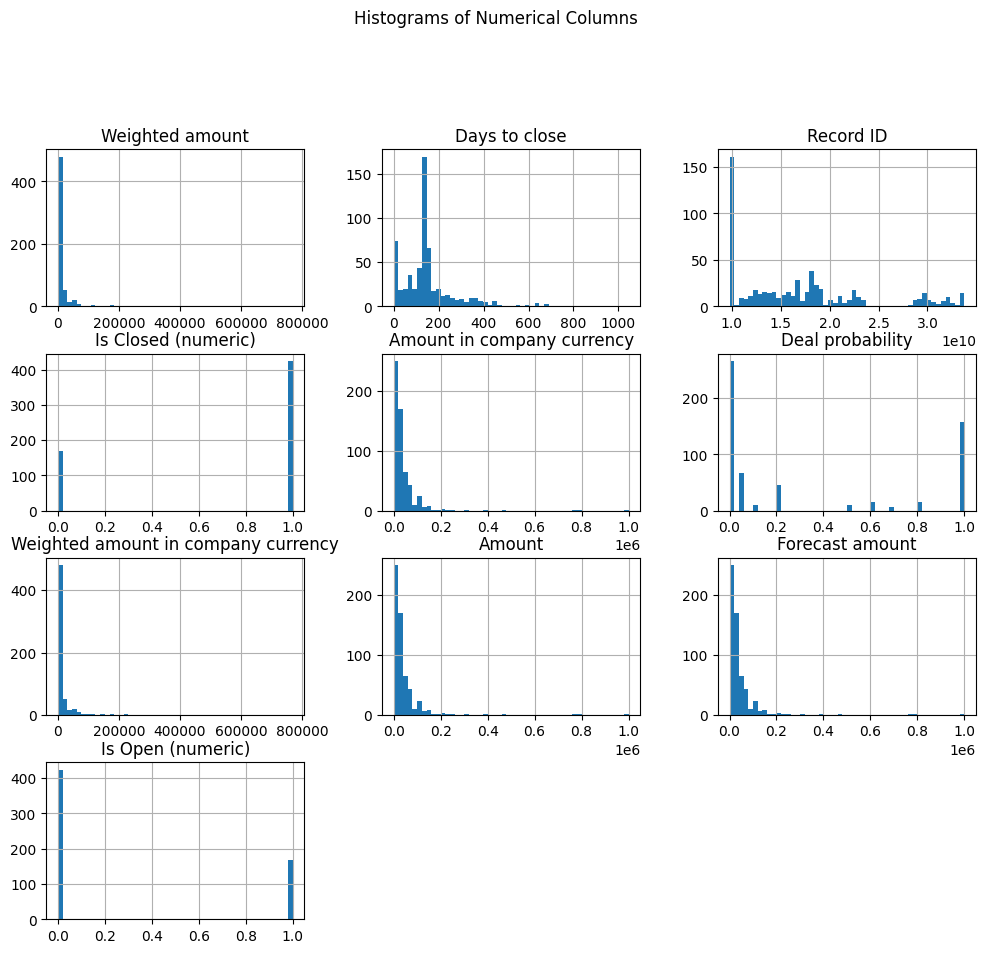

In [26]:
# EDA Analysis Step 4: Visualize the Data - Histograms
# Histograms for numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_df.hist(figsize=(12, 10), bins=50)
plt.suptitle("Histograms of Numerical Columns", x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()


As as continuation of visualizing the data set, scatter plots were created.  Relationships between numerical features and the target variable, is closed won, was explored.  Key insights form this analysis indicate that is closed won clusters around higher values of deal probability.  Additionally, features with financial elements such as amount, forecast amount, and weighted amount were heavily skewed. Some features were helpful in indicating a successful deals, but others were not as helpful.

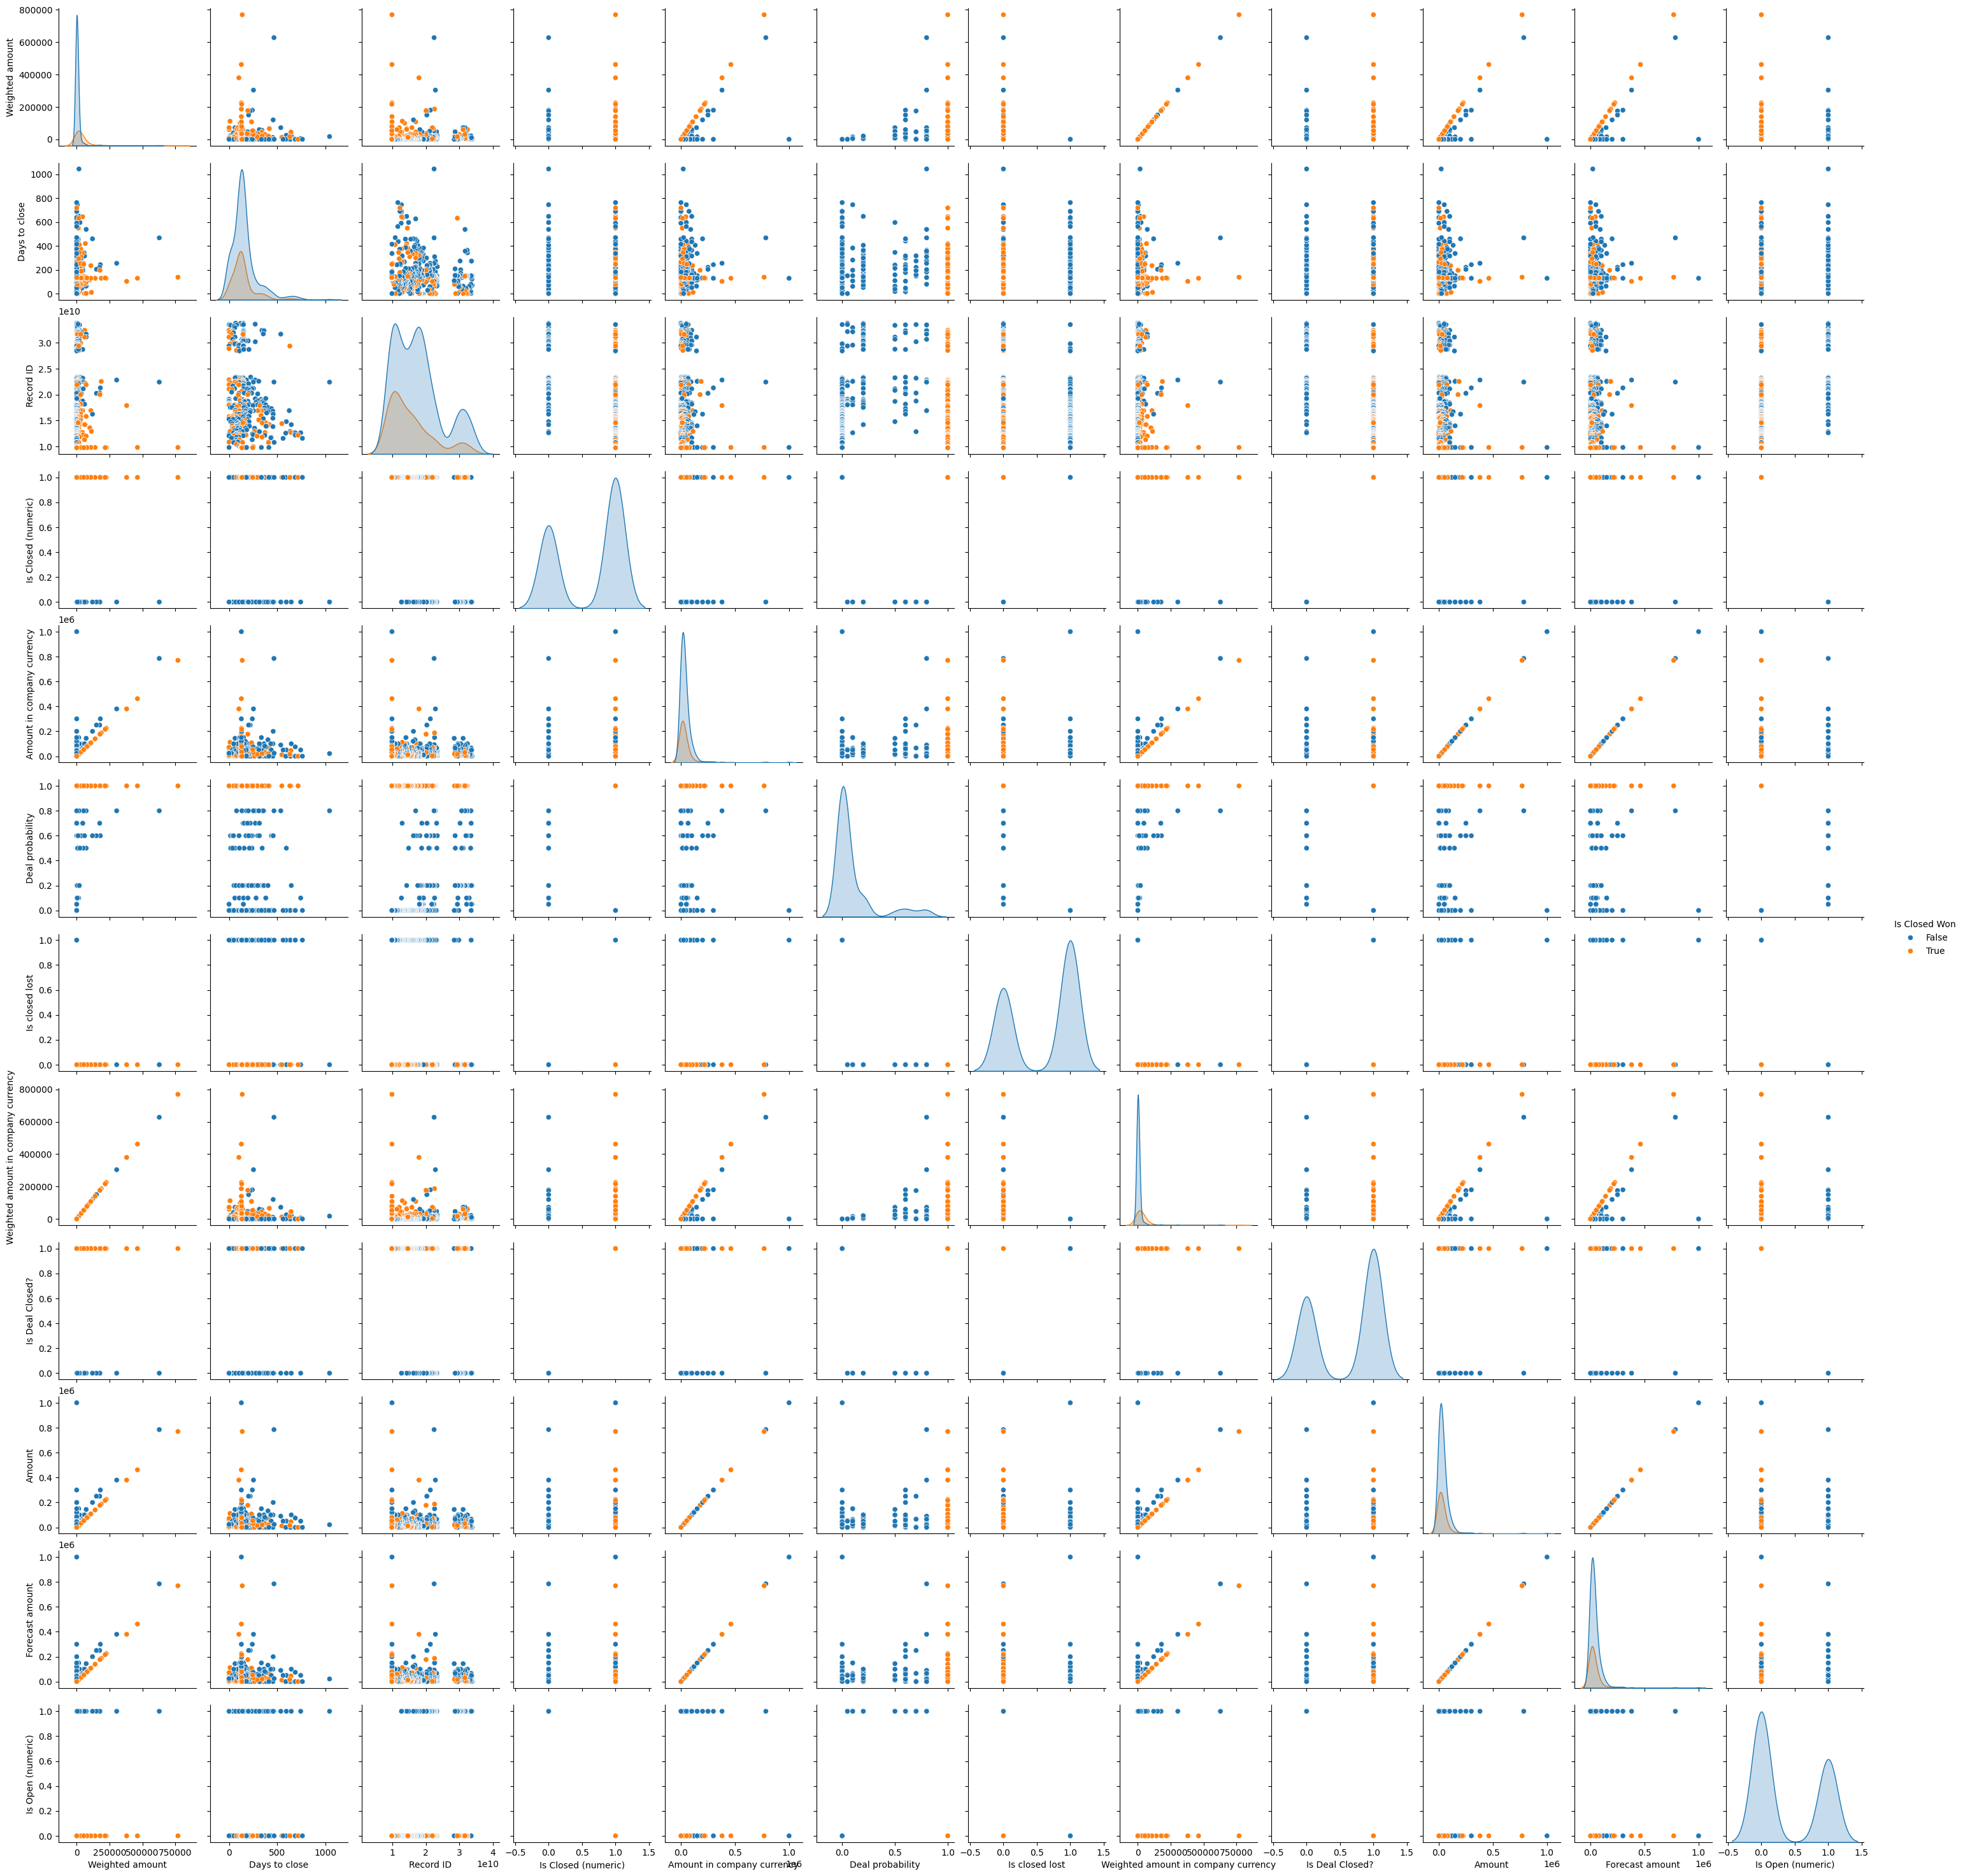

In [27]:
# EDA Analysis Step 4: Visualize the Data - Scatter Plots
# Scatter plots for numerical columns
sns.pairplot(df, hue='Is Closed Won')
plt.show()


As a continuation of the data visualization, box plots were created.  This was helpful to analyze the spread of the data set, and to visualize outliers as well.  Features with financial elements such as amount, forecast amount, and weighted amount had a lot of outliers that skewed the dataset.  So, outlier handling techniques are needed to improve the performance of the model.

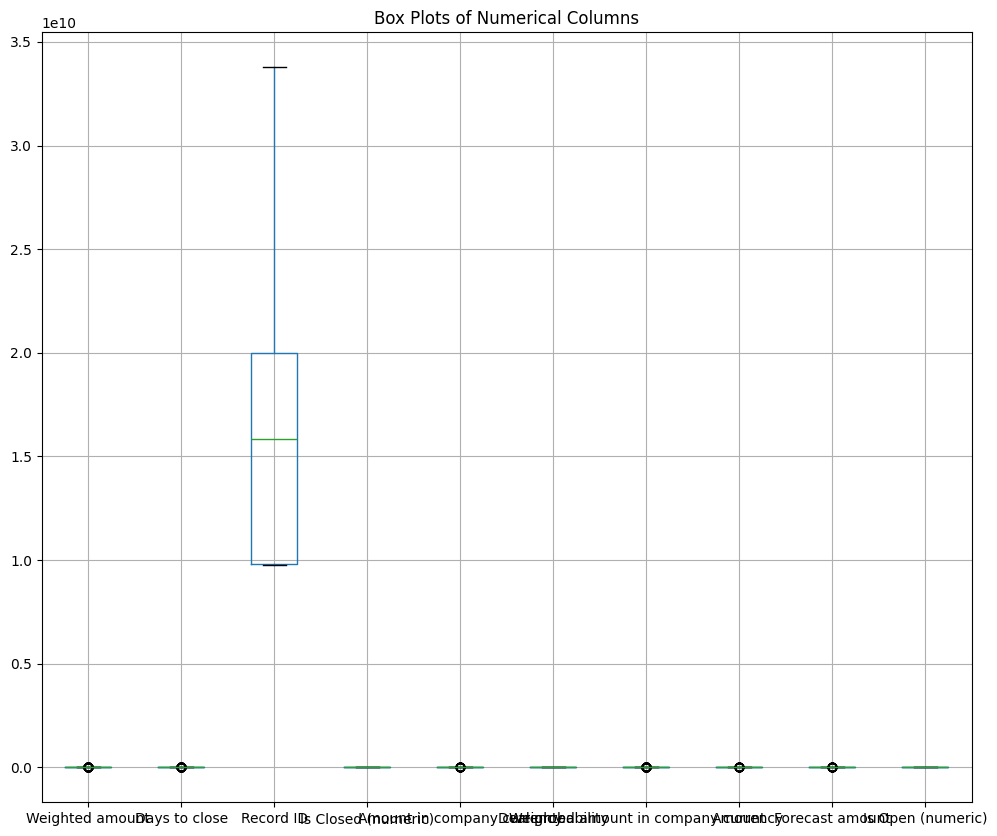

In [28]:
# EDA Analysis Step 4: Visualize the Data - Box Plots
# Box plots for numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_df.boxplot(figsize=(12, 10))
plt.title("Box Plots of Numerical Columns")
plt.show()


Lastly, the summary statistics for categorical columns were identified.  Key insights from this include many of the columns have a high number of unique values such as deal description, deal name, and associated company.  Whereas, some categorical columns such as pipeline only has one unique value. Additionally, some columns have dominant values such as deals stage (closed lost) and deal type (new) within their datasets.  So, there might be imbalance in these cateogories that might affect the model's prediction.

In [29]:
# summary statistics for categorical columns
summary_categorical = df.select_dtypes(include=['object', 'category']).describe()
print(summary_categorical)


       Deal Description Deal source attribution 2        Pipeline  \
count               491                       593             593   
unique              400                        13               1   
top                   .          SymTrain EE name  Sales Pipeline   
freq                 32                       198             593   

       Forecast category Original Traffic Source   Associated Company  \
count                593                     593                  572   
unique                 5                       6                  344   
top       Not forecasted         Offline Sources  Associated_ef811650   
freq                 347                     495                   23   

           Deal owner Associated Company (Primary)      Deal Name  \
count             593                          572            593   
unique             24                          338            588   
top     Deal_3d3dc242          Associated_ef811650  Deal_eed97016   
freq        

In [30]:
# lastly, export the cleaned dataset to a new CSV file
df.to_csv('cleaned_deals_dataset.csv')